In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

from src.suction_based_grasping.utils import *
from src.suction_based_grasping.convnet.model import *
from src.suction_based_grasping.convnet.data_utils import *

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
H, W = (224, 224) # default height and width of inputs to ResNet50

In [24]:
# load test/train data
X_train, X_test, y_train, y_test = train_test_split("train-split.txt", "test-split.txt", target_shape=(H, W))

Loading Training Data from train-split.txt


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Done!1470	100.00%
Loading Test Data from test-split.txt
Done!67	100.00%


[[[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 ...

 [[0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]]
(224, 224, 3)


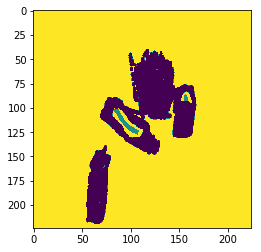

In [29]:
plt.imshow(np.argmax(y_train[3], axis=2))
print(y_train[3][100:125, 120:150])
print(y_train[3].shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

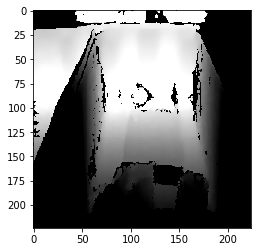

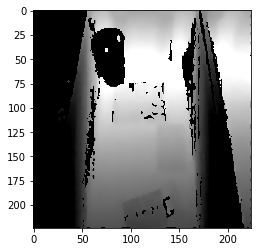

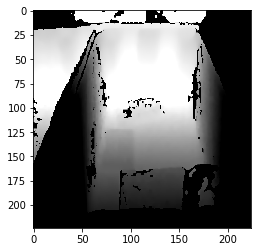

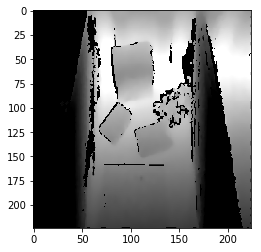

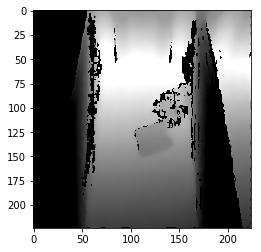

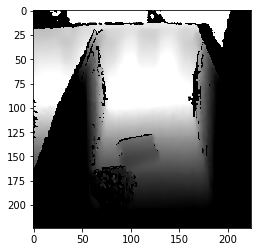

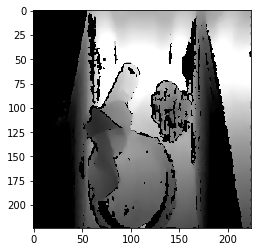

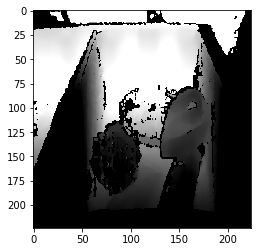

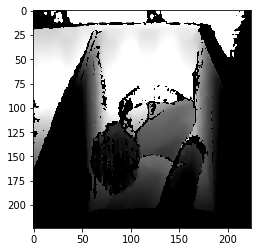

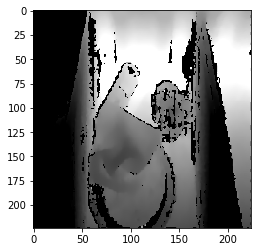

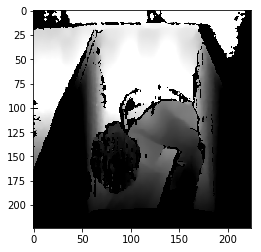

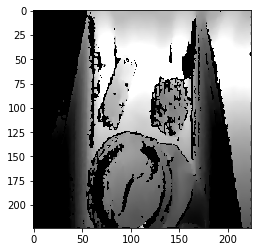

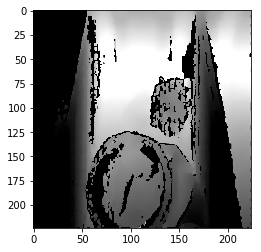

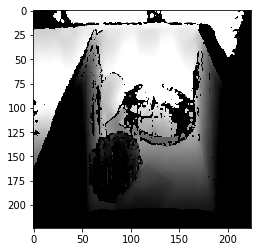

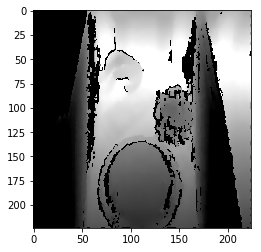

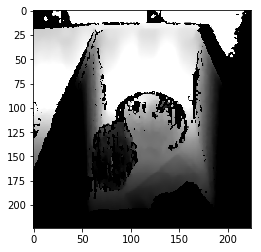

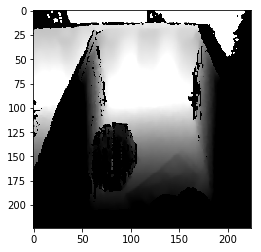

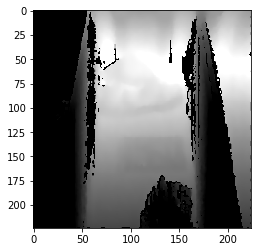

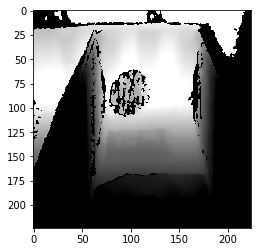

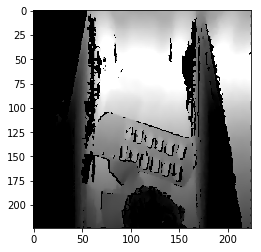

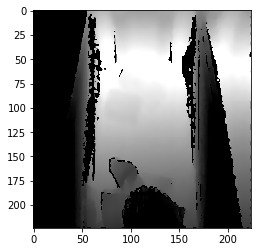

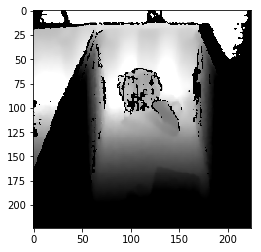

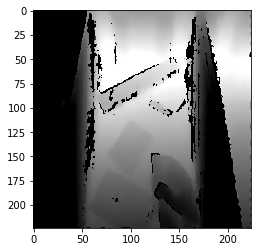

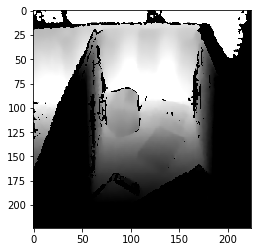

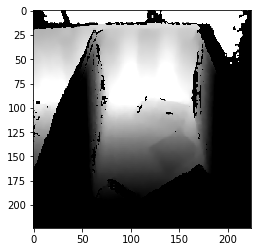

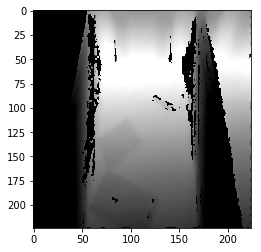

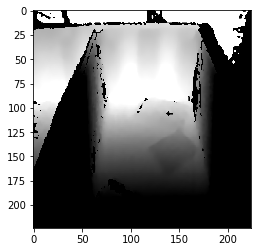

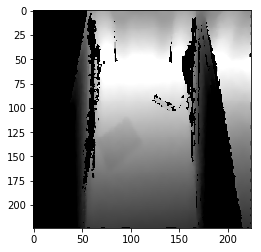

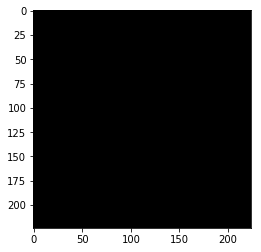

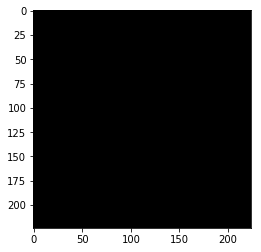

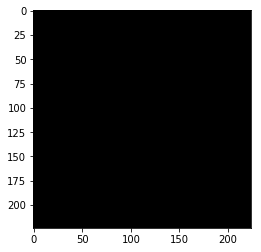

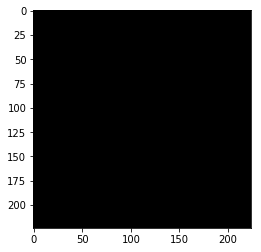

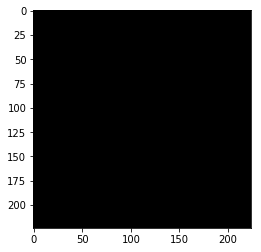

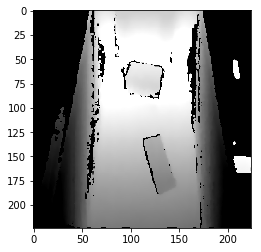

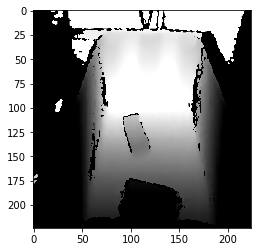

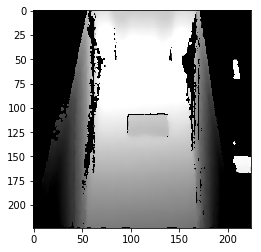

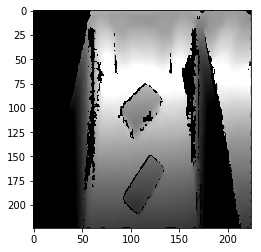

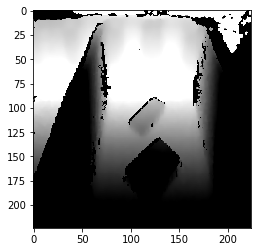

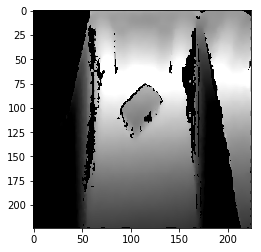

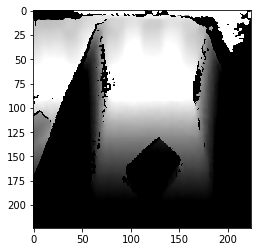

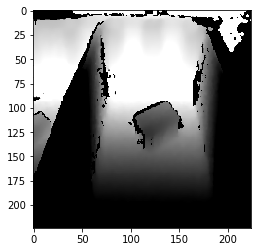

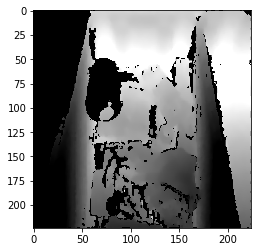

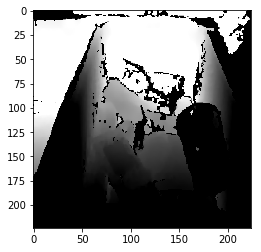

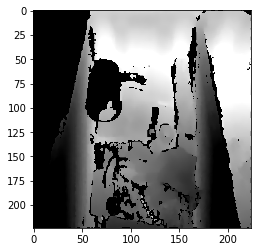

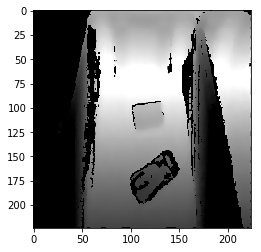

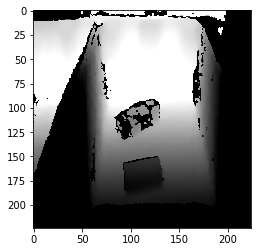

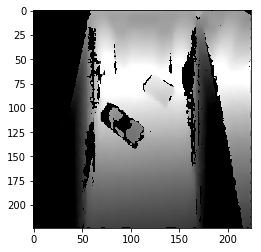

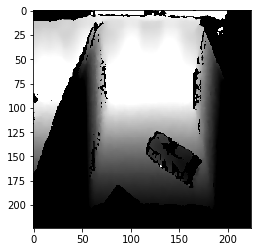

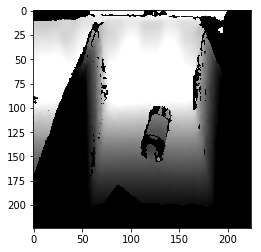

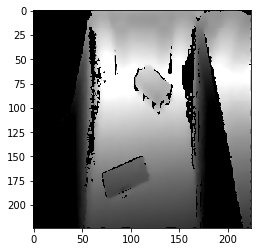

In [18]:
for i in range(180, 230):
    plt.figure()
    plt.imshow(X_train[1][i])
#     print(X_train[1][i])

In [10]:
train_frac = 0.8 # 8:1 train-val split
X_train, X_val, y_train, y_val = train_val_split(X_train, y_train, train_frac)

In [25]:
model = init_model((H, W))
model.fit(x=X_train, y=y_train, epochs=20, batch_size=128, validation_split=0.2)

ValueError: Error when checking target: expected Joe to have shape (1, 1, 3) but got array with shape (224, 224, 3)